In [50]:
import tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import numpy as np
from scipy.optimize import curve_fit

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + 'cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
leg_font = font_manager.FontProperties(size=12)
font = {'color':'black','size':12}

ufile1 = "../data/file1k100us.csv"
file2 = "../data/filelow.csv"
file3= "../data/file100001.csv"
ufile1_init = tools.files(ufile1)
file2_init = tools.files(file2)
file3_init = tools.files(file3)

flicker noise parameter  [5.90923491 1.34677368]
white noise parameter  [2.0644381e-05]


/tmp/ipykernel_30613/1857142648.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


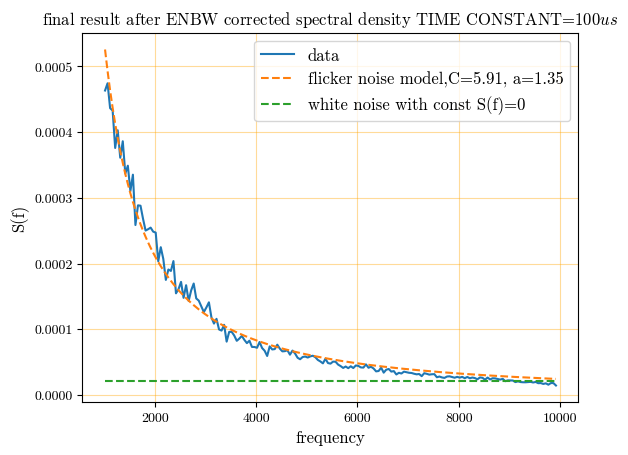

In [19]:
# data sorting as lower deviation
data0 = ufile1_init.sort_on_deviation(10)
data00,data01 = ufile1_init.point_mean(data0)

# ENBW corrected values of S(f)
data01 = data01/1250

# linearity guess
limit = 150 

# models for noise fitting
def flicker_noise(y,A,alpha):
    return A/(y**alpha)

def white(y,c):
    return 0.0*y+c

# Curve fitting
param, param_cov = curve_fit(flicker_noise, data00[:],data01[:])
param_white, param_cov_white = curve_fit(white,data00[limit:],data01[limit:])
print("flicker noise parameter ", param)
print("white noise parameter ",param_white)
# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[:],flicker_noise(data00[:],param[0],param[1]),label=f"flicker noise model,C={round(param[0],2)}, a={round(param[1],2)}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0])}",linestyle="dashed")
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$us$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_1000_100us.png",dpi=1000)


In [47]:
data = ufile1_init.get_mean()
data2,c =file2_init.shady_plot()
data2 = data2[0]/1.25
limit = 179

def flicker_noise(y,A,alpha):
    return A/(y**alpha)
def white(y,c):
    return 0.0*y+c

param, param_cov = curve_fit(flicker_noise, data[:,0],data[:,1])

param2, param_cov2 = curve_fit(flicker_noise, data2[:,0],data2[:,1])
# param_white, param_cov_white = curve_fit(white,data[len(data)-5:,0],data[len(data)-5:,1])
param2
    # ax.plot(first,second)ax.plot(data[:,0],flicker_noise(data[:,0],param[0],param[1]))

array([ 0.05239212, -0.64836618])

/tmp/ipykernel_7222/2745035116.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


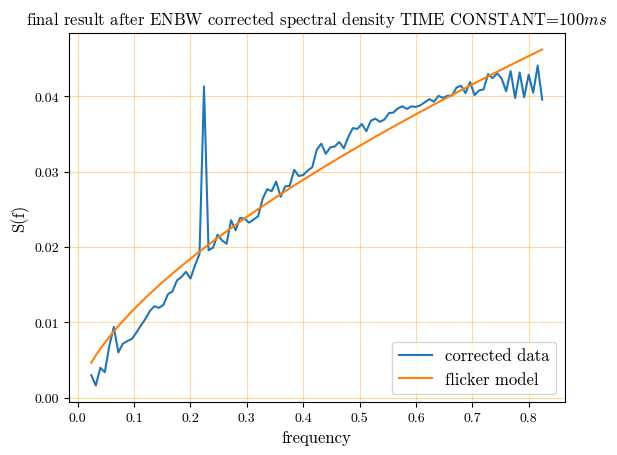

In [48]:
fig,ax = plt.subplots()

ax.plot(data2[:,0],data2[:,1],label="corrected data")
ax.plot(data2[:,0],flicker_noise(data2[:,0],param2[0],param2[1]),label="flicker model")
# ax.plot(data[:,0],white(data[:,0],param_white[0]))
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$ms$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_1_100ms.png",dpi=1000)



## Theoritical

/tmp/ipykernel_7222/2469447044.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()
/tmp/ipykernel_7222/2469447044.py:3: RuntimeWarning: divide by zero encountered in divide
  return A/(y**alpha)


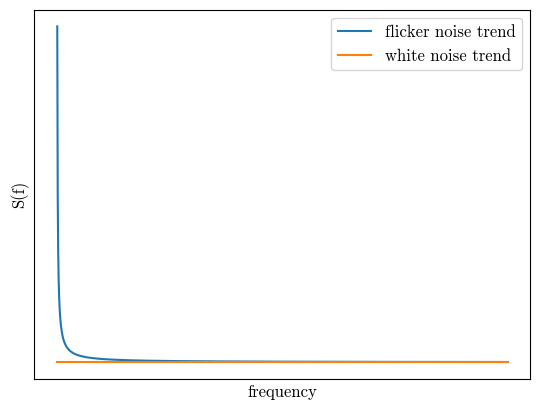

In [17]:
thx = np.linspace(0,1,1000)
def flicker_noise(y,A,alpha):
    return A/(y**alpha)
def white(y,c):
    return 0.0*y+c



fig,ax = plt.subplots()
ax.plot(thx,flicker_noise(thx,1,1),label="flicker noise trend")
ax.plot(thx,white(thx,.05),label="white noise trend")
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(prop= leg_font)
plt.savefig("thnoise.png",dpi=1000)



flicker noise parameter  [0.13707877 0.92287006]
white noise parameter  [1.20525914e-05]


/tmp/ipykernel_7222/1829545390.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


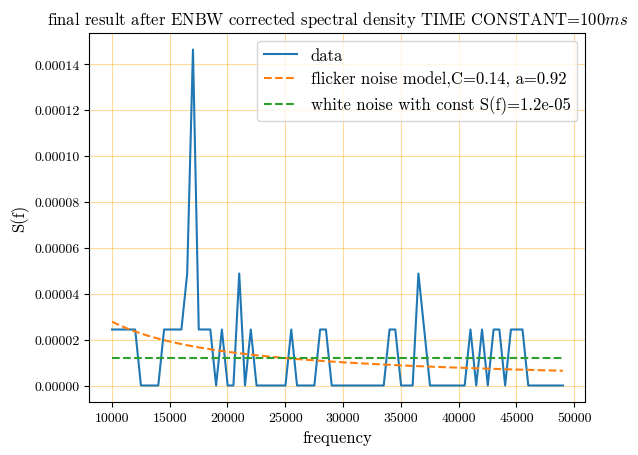

In [66]:
# data sorting as lower deviation)
data0 = file3_init.sort_on_deviation(5)
data00,data01 = file3_init.point_mean(data0)
# ENBW corrected values of S(f)
data01 = data01/1.250

# linearity guess
limit = 150 

# models for noise fitting
def flicker_noise(y,A,alpha):
    return A/(y**alpha)

def white(y,c):
    return 0.0*y+c

# Curve fitting
param, param_cov = curve_fit(flicker_noise, data00[:],data01[:])
param_white, param_cov_white = curve_fit(white,data00[:],data01[:])
print("flicker noise parameter ", param)
print("white noise parameter ",param_white)
# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[:],flicker_noise(data00[:],param[0],param[1]),label=f"flicker noise model,C={round(param[0],2)}, a={round(param[1],2)}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0],6)}",linestyle="dashed")
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$ms$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_10000_100ms.png",dpi=1000)


/tmp/ipykernel_7222/1285323352.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


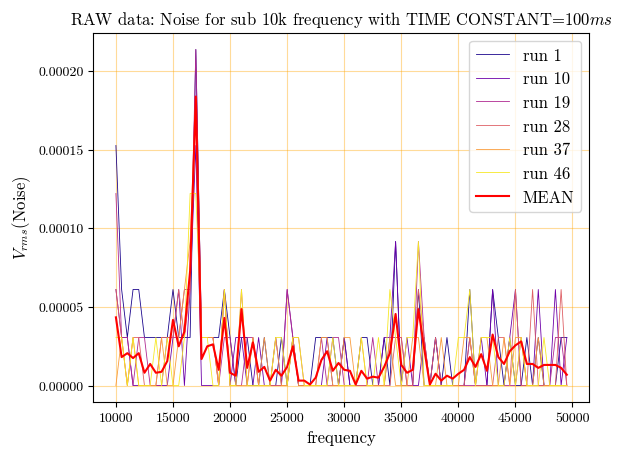

In [69]:
diff_data, colormap = file3_init.shady_plot("plasma")
data = file3_init.get_mean()
total_points=5
fig, ax = plt.subplots()
for i in range(1,len(diff_data),int(len(diff_data)/total_points)):
    ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"run {i}",linewidth= .6)
    # ax.plot(diff_data[i][:,0],diff_data[i][:,1],'ro')
ax.plot(data[:,0],data[:,1],"r",label="MEAN",linewidth =1.5)
# ax.set(ylim=(0.0,0.001))
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("$V_{rms}$(Noise)",fontdict=font)
ax.set_title("RAW data: Noise for sub 10k frequency with TIME CONSTANT=100$ms$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("raw10000100ms.png",dpi=1000)
